In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 

reading data

In [2]:
df = pd.read_csv(r'C:\Users\pjr\OneDrive\Documents\data science\BNB Price Prediction\archive\AB_US_2023.csv')

C:\Users\pjr\AppData\Local\Temp\ipykernel_7300\3455521027.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\pjr\OneDrive\Documents\data science\BNB Price Prediction\archive\AB_US_2023.csv')


Understanding the dataset 

In [3]:
# Understanding the dataset 

print(df.shape) # No of rows and columns

df.head() # First 5 rows of the dataset
#df.tail() # Last 5 rows of the dataset


(232147, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [4]:
# info about the dataset 
df.info()  # datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [5]:
# Describe statistics on a dataset 
# Only works in numerical data 
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.321470e+05,2.321470e+05,232147.000000,232147.000000,232147.000000,232147.000000,232147.000000,183062.000000,232147.000000,232147.000000,232147.000000
mean,2.584580e+17,1.582248e+08,36.610585,-98.301436,259.468001,13.495867,40.915230,1.638348,29.879055,180.985686,11.689701
std,3.465985e+17,1.587164e+08,5.126523,19.706929,1024.645918,27.920631,80.649152,1.910812,106.013665,134.715299,20.599954
min,6.000000e+00,2.300000e+01,25.957323,-123.089130,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.638896e+07,2.299242e+07,33.976225,-118.315111,91.000000,2.000000,1.000000,0.310000,1.000000,52.000000,0.000000
50%,4.896307e+07,1.005783e+08,36.190556,-97.727670,149.000000,3.000000,9.000000,1.000000,2.000000,175.000000,3.000000
75%,6.633014e+17,2.686930e+08,40.717440,-77.026222,250.000000,30.000000,43.000000,2.420000,10.000000,321.000000,16.000000
max,8.581014e+17,5.069384e+08,47.734010,-70.996000,100000.000000,1250.000000,3091.000000,101.420000,1003.000000,365.000000,1314.000000


In [6]:
# Number of columns in the dataset 
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city'],
      dtype='object')

In [7]:
df.duplicated() # Duplicated rows 

0         False
1         False
2         False
3         False
4         False
          ...  
232142    False
232143    False
232144    False
232145    False
232146    False
Length: 232147, dtype: bool

In [8]:
# Check for number of unique values in descending order 
df.nunique().sort_values(ascending=False)

id                                232146
name                              220164
longitude                         159988
latitude                          157966
host_id                           119582
host_name                          29368
last_review                         3147
price                               2429
neighbourhood                       1412
reviews_per_month                   1367
number_of_reviews                    861
availability_365                     366
number_of_reviews_ltm                271
minimum_nights                       178
calculated_host_listings_count       149
neighbourhood_group                   30
city                                  27
room_type                              4
dtype: int64

Cleaning data 

In [9]:
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               135647
reviews_per_month                  49085
last_review                        49085
name                                  16
host_name                             13
id                                     0
number_of_reviews                      0
number_of_reviews_ltm                  0
availability_365                       0
calculated_host_listings_count         0
price                                  0
minimum_nights                         0
room_type                              0
longitude                              0
latitude                               0
neighbourhood                          0
host_id                                0
city                                   0
dtype: int64

In [10]:

# 1. Drop the first column
df = df.drop(columns=['neighbourhood_group'])

# 2. Remove rows with null values in the second column
df = df.dropna(subset=['host_name', 'name'])




In [11]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [12]:
df.isna().sum()


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       49068
reviews_per_month                 49068
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
city                                  0
dtype: int64

<Axes: xlabel='reviews_per_month', ylabel='Count'>

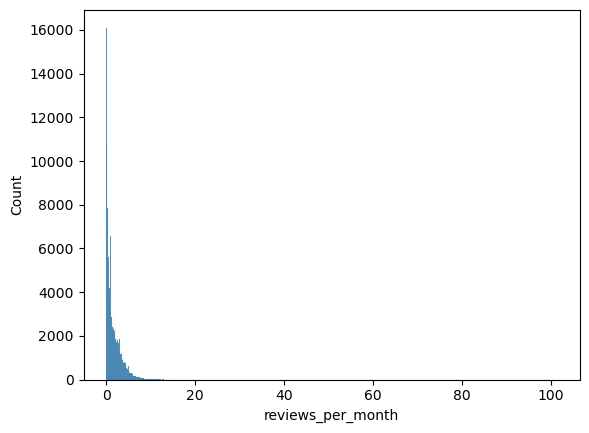

In [13]:
sns.histplot(df['reviews_per_month']) # bins = 10

Transforming categorical to numeric data

Identifying outliers

In [14]:
# df['price'].value_counts() \
#  .head(20) \
#  .plot(kind='bar', title='Frequency of the first 20 mode price')

In [15]:
new_df = df.drop(columns=['id','host_id','latitude','longitude'])
new_df.head()

,name,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,"Bright, Modern Garden Unit - 1BR/1BTH",Holly,Western Addition,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,Creative Sanctuary,Philip And Tania,Bernal Heights,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,Friendly Room Apt. Style -UCSF/USF - San Franc...,Aaron,Haight Ashbury,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,Historic Alamo Square Victorian,Rosy,Western Addition,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,"Mission Sunshine, with Private Bath",Ivan & Wendy,Mission,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >,
        <Axes: >]], dtype=object)

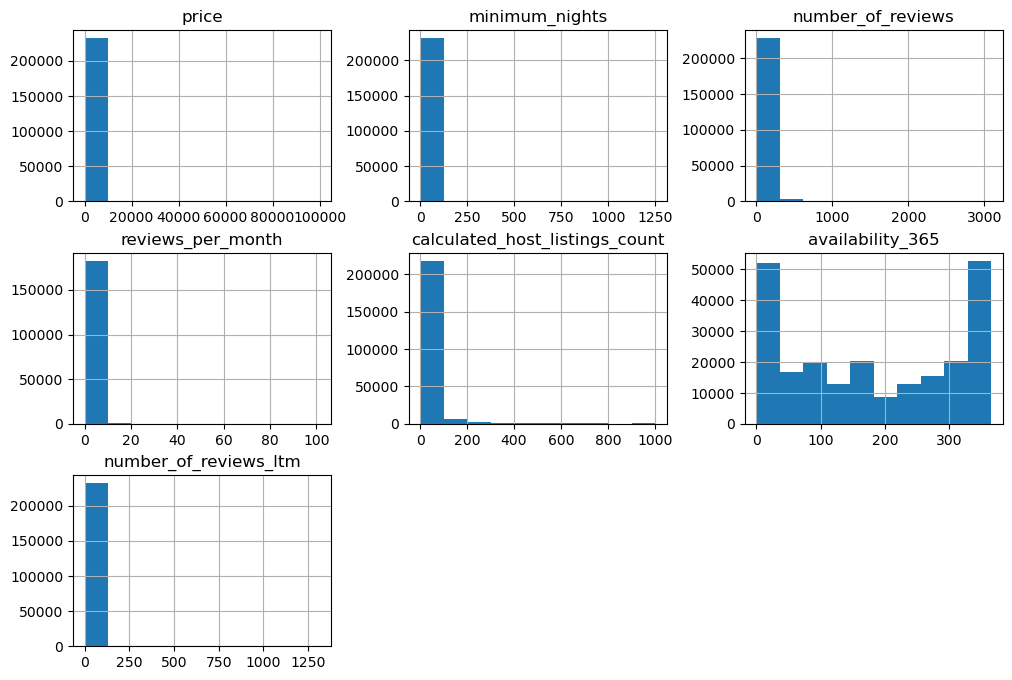

In [16]:
new_df.hist(figsize=(12,8))

From the above histograms, we can tell that very few rows have extreme values.

In [17]:
# Transforming categorical to numeric data/// Nominal data
# new_df = pd.get_dummies(data=new_df, columns=['room_type'])
# new_df.head()

<Axes: >

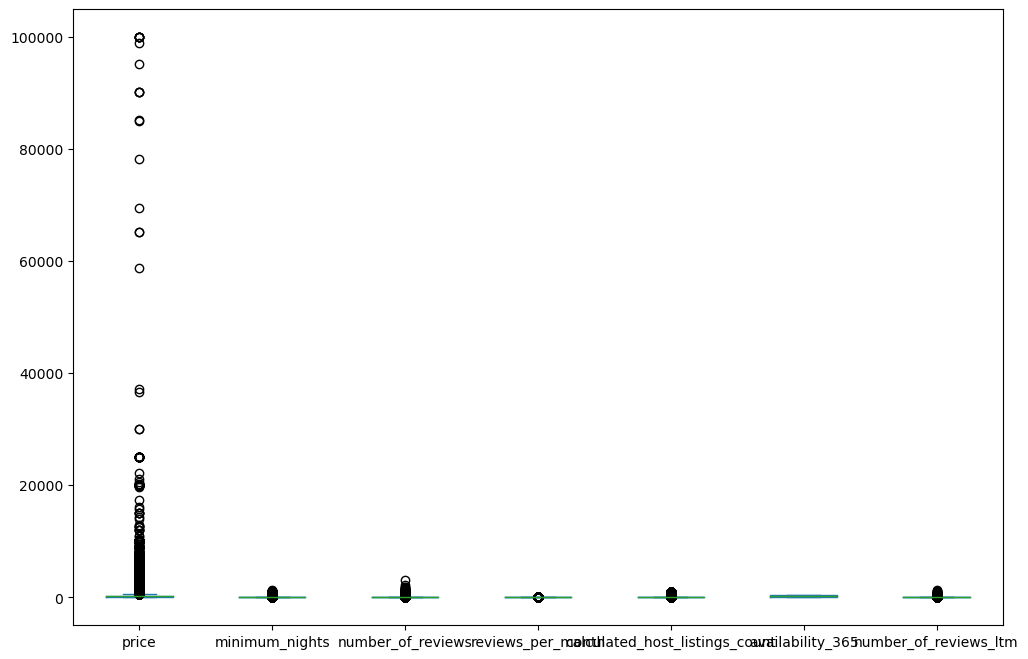

In [18]:
new_df.plot(kind='box', figsize=(12,8))

Next i want to check if price affects minimum nights

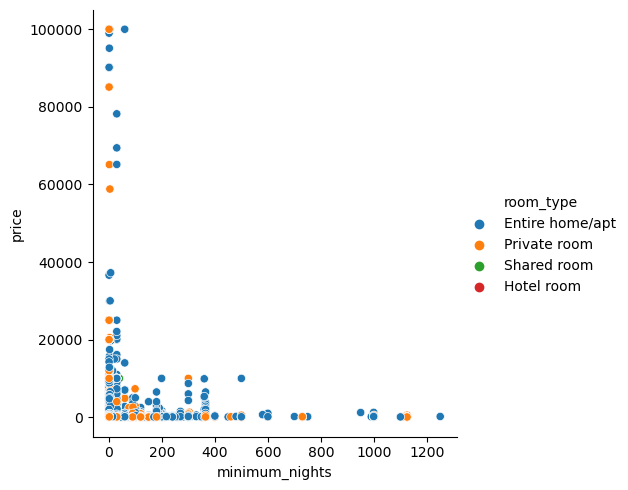

In [19]:
sns.relplot(x ='minimum_nights', y= 'price',hue='room_type', data=new_df)

Count plot of categorical column

Getting the number of appearances of a categorical column 

<Axes: xlabel='room_type', ylabel='count'>

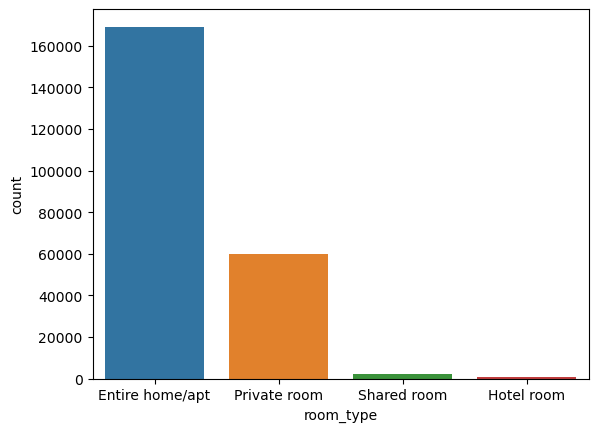

In [20]:
sns.countplot(data=new_df, x='room_type')

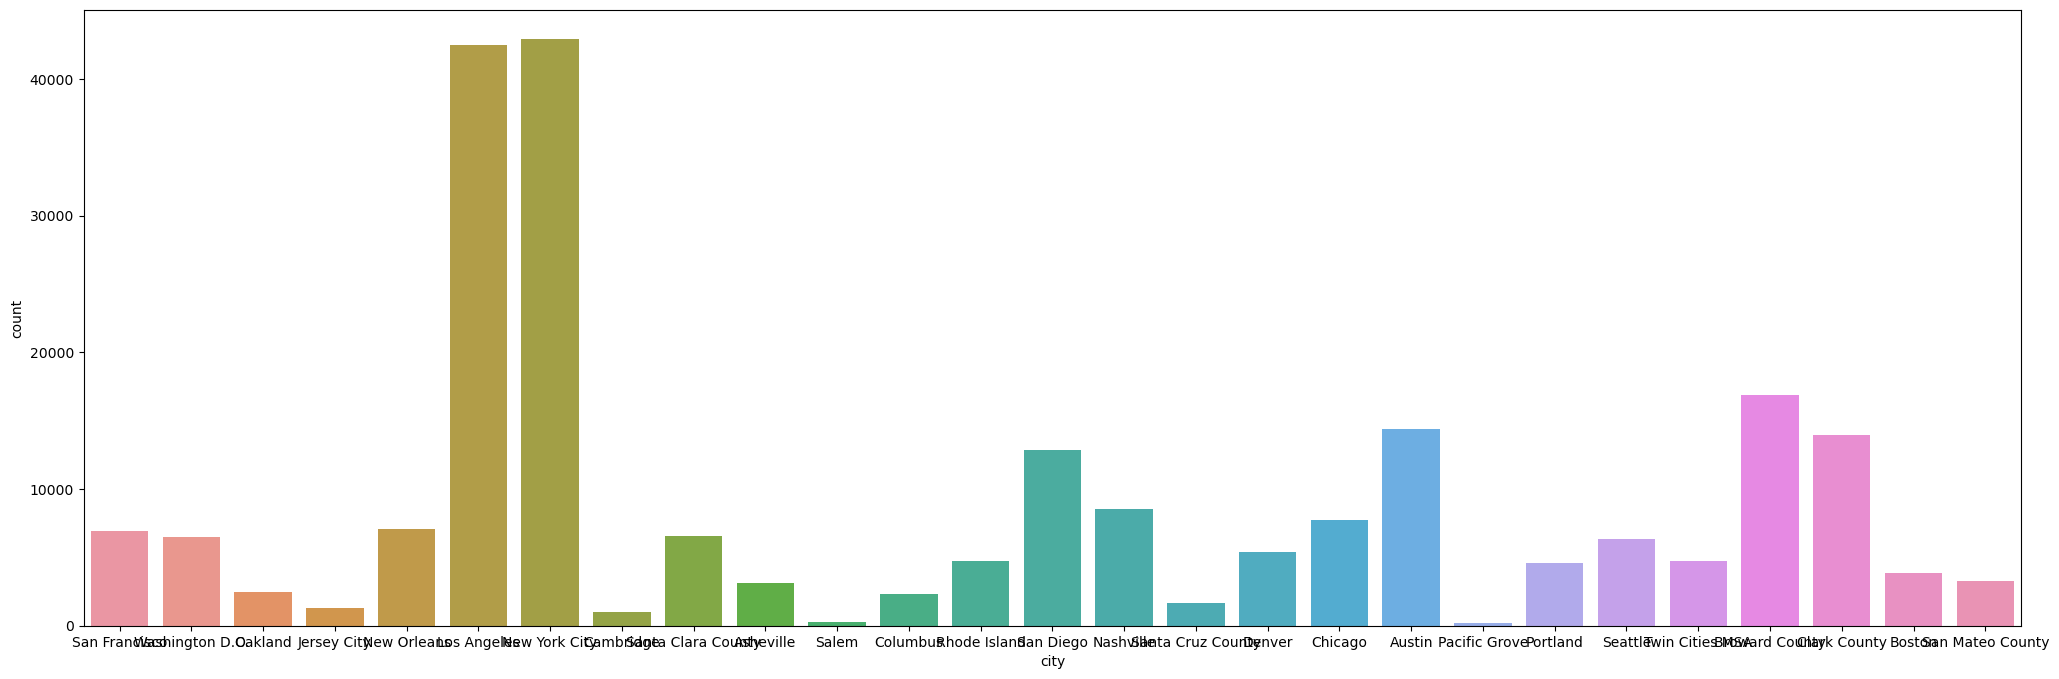

In [21]:
plt.figure(figsize=(25, 8))
sns.countplot(data=new_df, x='city')
plt.show()

Dealing with outliers 

In [22]:
#Function to display the boxplot and histogram of a column
def plot(data, col):
    #figure size
    plt.figure(figsize=(12,8))
    #plot histogram
    plt.subplot(1,2,1)
    plt.hist(data[col])
    #plot boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    # plot
    plt.show()

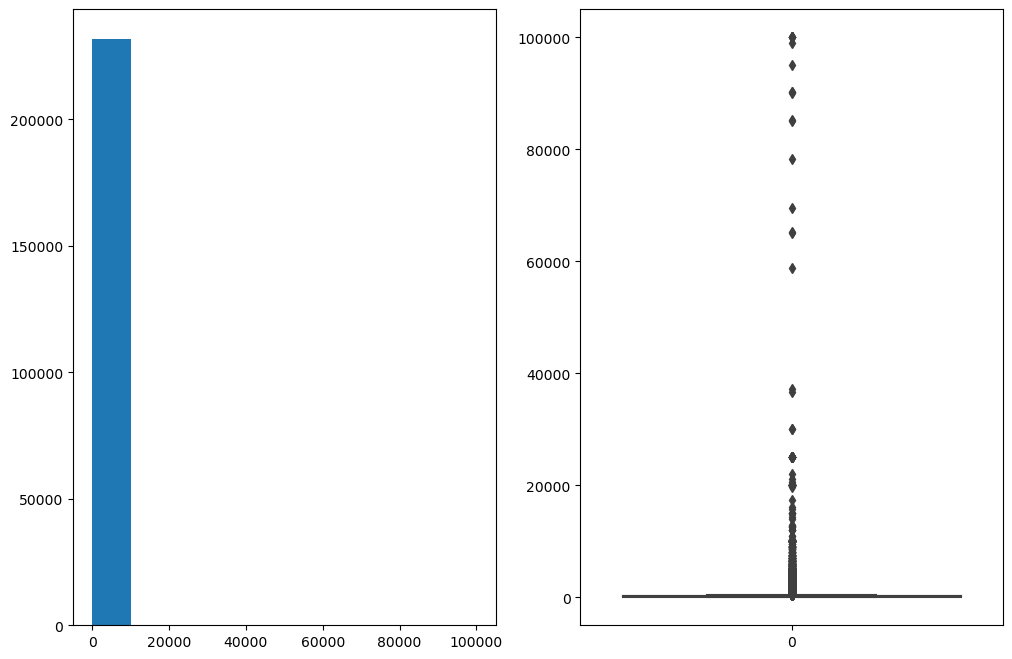

In [23]:
plot(new_df,'price')

In [24]:
# Function to calculate and return lower and upper limit 
def find_boundaries(data,col):
    Q1 = data[col].quantile(.25)
    Q3 = data[col].quantile(.75)
    IQR = Q3 - Q1 # finding the IQR
    # Finding lower and upper limit 
    lower_boundry = Q1 - 1.5 * IQR
    upper_boundry = Q3 + 1.5 * IQR
    return lower_boundry, upper_boundry    

In [25]:
find_boundaries(new_df,'price')

(-147.5, 488.5)

In [26]:
lower_price , upper_price = find_boundaries(new_df, 'price')
print("The lower boundry is: ", lower_price)
print("The upper boundry is: ", upper_price)

The lower boundry is:  -147.5
The upper boundry is:  488.5


Remove Outliers 

In [27]:
# Return true for outlier and false for non-outliers
outlier_price = np.where(new_df['price']< lower_price , True, np.where(new_df['price']> upper_price, True, False))
outlier_price

array([False, False, False, ..., False, False, False])

In [28]:
new_df.shape

(232118, 13)

In [29]:
new_df1 = new_df.loc[~(outlier_price),]
new_df1.shape

(212612, 13)

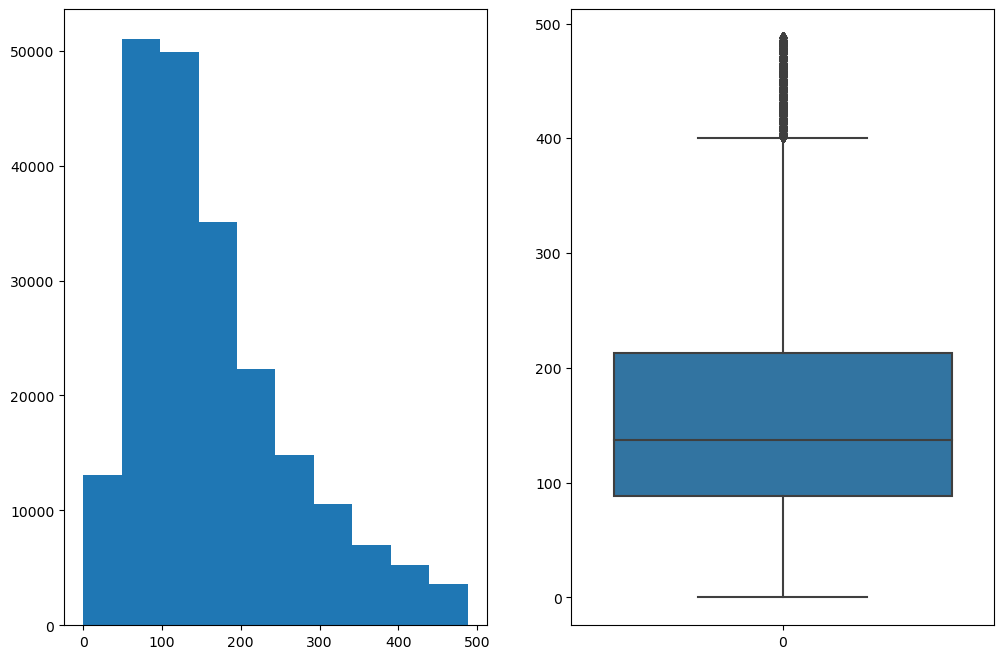

In [30]:
plot(new_df1,'price')

Relationship matrix

In [31]:
correlation = df.corr()

C:\Users\pjr\AppData\Local\Temp\ipykernel_7300\3853220190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

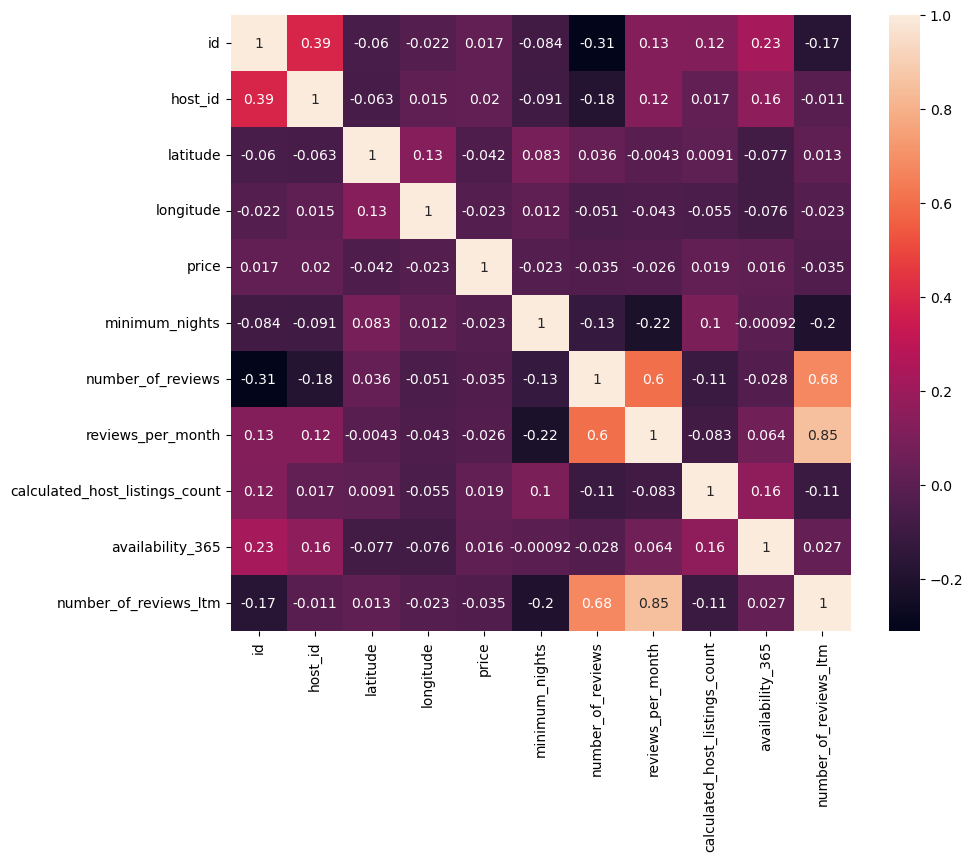

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, )